# TODO
- something that looks like solway figure!
- with all planning algorithms !!

- writing, solway, subway, experiment??

- 1. option learning for the graphs
- : do 2-option diagonal one, 1-option pair grids, 3-option hanoi

In [1]:
from ipypb import track as tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np
import itertools
import numba
import random
import diffplan
import astar
import envs
import prior_envs
import heapq
import joblib
%load_ext autoreload
%autoreload 2
%matplotlib inline

eps = torch.finfo().eps

In [26]:
def log_options(terminations):
    eta = terminations.softmax(1)
    for o in range(eta.shape[0]):
        print(o, sorted([(round(p.item(), 2), idx) for idx, p in enumerate(eta[o]) if p > 1e-2])[::-1])

In [55]:
env = prior_envs.f2c
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
_=diffplan.option_learner_enum(env, search_cost=(D+BFS), num_options=1, top_results=10)

{'options': (5,), 'value': -6.453541231155396}
{'options': (4,), 'value': -6.453541707992554}
{'options': (8,), 'value': -6.468213415145874}
{'options': (6,), 'value': -6.46821346282959}
{'options': (1,), 'value': -6.4682135581970215}
{'options': (3,), 'value': -6.468213605880737}
{'options': (7,), 'value': -6.548350429534912}
{'options': (9,), 'value': -6.548350620269775}
{'options': (0,), 'value': -6.548350811004639}
{'options': (2,), 'value': -6.548350811004639}


In [2]:
env = prior_envs.f2c
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
_=diffplan.option_learner_enum(env, search_cost=D+BFS, num_options=2)

{'options': (4, 5), 'value': -5.816047191619873}
{'options': (5, 8), 'value': -5.841304850578308}
{'options': (5, 6), 'value': -5.841304898262024}


In [45]:
env = prior_envs.f2d
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
d=diffplan.option_learner_enum(env, search_cost=D+BFS, num_options=1, top_results=19)

{'options': (9,), 'value': -11.837311343142861}
{'options': (16,), 'value': -11.905988617947227}
{'options': (2,), 'value': -11.905988768527383}
{'options': (8,), 'value': -11.905988818720767}
{'options': (10,), 'value': -11.905988868914152}
{'options': (17,), 'value': -11.954284793452212}
{'options': (7,), 'value': -11.954285019322446}
{'options': (11,), 'value': -11.954285094612523}
{'options': (1,), 'value': -11.954285119709215}
{'options': (13,), 'value': -11.979284738239489}
{'options': (5,), 'value': -11.979284913916336}
{'options': (4,), 'value': -12.03266914267289}
{'options': (14,), 'value': -12.03266924305966}
{'options': (18,), 'value': -12.069471785896702}
{'options': (0,), 'value': -12.069472237637168}
{'options': (12,), 'value': -12.069472338023939}
{'options': (6,), 'value': -12.069472388217324}
{'options': (15,), 'value': -12.088872181741815}
{'options': (3,), 'value': -12.088872533095511}


In [7]:
env = prior_envs.f2d
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
_=diffplan.option_learner_enum(env, search_cost=D+BFS, num_options=2)

{'options': (9, 16), 'value': -11.040211627357884}
{'options': (9, 10), 'value': -11.040211752841348}
{'options': (8, 9), 'value': -11.04021177793804}


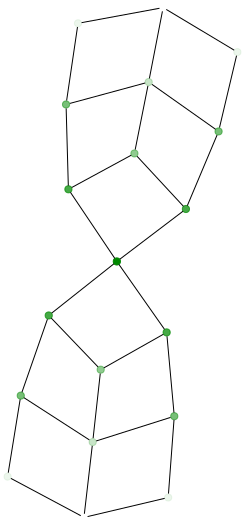

In [8]:
indexed = {row['options'][0]: row['value'] for row in d}
diffplan.plot_graph(env, z=[indexed[idx] for idx in range(len(env.states))])

In [63]:
env = prior_envs.f2f
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
d=diffplan.option_learner_enum(env, search_cost=D+BFS, num_options=1, top_results=27)

{'options': (23,), 'value': -16.453394501297563}
{'options': (20,), 'value': -16.453394607261377}
{'options': (4,), 'value': -16.453394642582648}
{'options': (3,), 'value': -16.453394713225187}
{'options': (19,), 'value': -16.453394889831543}
{'options': (10,), 'value': -16.453395137080438}
{'options': (2,), 'value': -16.458561332137496}
{'options': (18,), 'value': -16.458561367458767}
{'options': (9,), 'value': -16.458561544065123}
{'options': (5,), 'value': -16.458561579386394}
{'options': (21,), 'value': -16.45856182663529}
{'options': (24,), 'value': -16.45856207388419}
{'options': (11,), 'value': -16.628660449275262}
{'options': (12,), 'value': -16.628660873130517}
{'options': (14,), 'value': -16.62866090845179}
{'options': (13,), 'value': -16.62866104973687}
{'options': (15,), 'value': -16.62866133230704}
{'options': (16,), 'value': -16.628661614877206}
{'options': (17,), 'value': -16.692366317466455}
{'options': (1,), 'value': -16.692366352787726}
{'options': (8,), 'value': -16.

In [109]:
env = prior_envs.f2f
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
d=diffplan.option_learner_enum(env, search_cost=D+BFS, num_options=3, top_results=10, tqdm=tqdm)
_=joblib.dump(d, 'f2f-enum-op3-bfs.bin')

 [████████████████████████████████████████████████████████████] 2925/2925 [07:17<00:00, 0.15s/it]

{'options': (4, 9, 23), 'value': -14.809240871005589}
{'options': (3, 18, 20), 'value': -14.80924090632686}
{'options': (4, 10, 24), 'value': -14.80924090632686}
{'options': (2, 19, 20), 'value': -14.809241118254485}
{'options': (5, 10, 23), 'value': -14.809241118254485}
{'options': (3, 19, 21), 'value': -14.809241153575757}
{'options': (2, 19, 21), 'value': -14.840645790100098}
{'options': (5, 10, 24), 'value': -14.840645790100098}
{'options': (2, 18, 20), 'value': -14.840645966706452}
{'options': (3, 18, 21), 'value': -14.840646107991537}


In [107]:
env = prior_envs.f2f

h = envs.compute_blocks_distance_heuristic(env)
a_star_distance, a_star_cost = astar.compute_astar_matrix(env, h, samples=100, tqdm=tqdm)
c = (a_star_distance + a_star_cost).float()

d=diffplan.option_learner_enum(env, search_cost=c, num_options=3, top_results=20, tqdm=tqdm)
_=joblib.dump(d, 'f2f-enum-op3-run2.bin')

 [████████████████████████████████████████████████████████████] 27/27 [01:16<00:03, 2.83s/it]

 [████████████████████████████████████████████████████████████] 2925/2925 [05:52<00:00, 0.12s/it]

{'options': (4, 10, 23), 'value': -7.795999332710549}
{'options': (3, 19, 20), 'value': -7.802996140939218}
{'options': (10, 19, 23), 'value': -7.810219446818034}
{'options': (3, 4, 23), 'value': -7.8123564896760165}
{'options': (3, 19, 23), 'value': -7.813529456103289}
{'options': (4, 10, 20), 'value': -7.81400438591286}
{'options': (10, 19, 20), 'value': -7.814657070018627}
{'options': (3, 4, 20), 'value': -7.815325277822989}
{'options': (10, 18, 19), 'value': -8.021881545031512}
{'options': (2, 3, 23), 'value': -8.02231823956525}
{'options': (9, 10, 19), 'value': -8.022711524256954}
{'options': (4, 20, 21), 'value': -8.023393701623988}
{'options': (3, 23, 24), 'value': -8.023730066087511}
{'options': (4, 5, 20), 'value': -8.025673830950701}
{'options': (2, 10, 23), 'value': -8.030709814142298}
{'options': (4, 21, 23), 'value': -8.03141450881958}
{'options': (4, 10, 18), 'value': -8.032814379091617}
{'options': (3, 9, 19), 'value': -8.036578584600377}
{'options': (5, 19, 20), 'value'

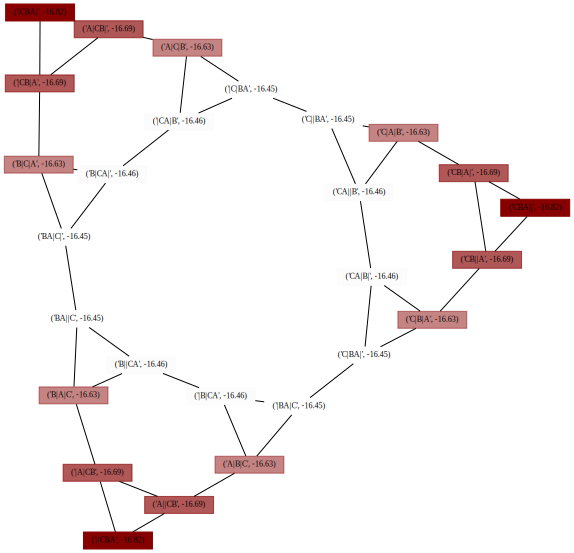

In [24]:
indexed = {row['options'][0]: row['value'] for row in d}
diffplan.plot_graph(
    env,
    labels=[str(('|'.join(''.join(c) for c in s), round(indexed[env.states_to_idx[s]], 2))) for s in env.states_features],
    z=[-indexed[idx] for idx in range(len(env.states))])

In [96]:
import copy
env = copy.copy(prior_envs.f2f)
env.start_states = env.states
env.goal_set = set(env.states_features)
#env.start_states = [20]
#env.goal_set = {env.states_features[21]}

#D = diffplan.compute_distance_matrix(env)
#BFS = diffplan.compute_bfs_matrix(env, D)
#c = D + BFS

#h = envs.compute_blocks_distance_heuristic(env)
#a_star_distance, a_star_cost = astar.compute_astar_matrix(env, h, samples=20, tqdm=tqdm)
#c = a_star_distance + a_star_cost

#d=diffplan.option_learner(env, reset=200, search_cost=c, progress=20, grad_steps=300, lr=0.05, num_options=6, goal_uniform_random=True, plot=False, add_goal_options=True, term_max=1.)
d=diffplan.option_learner(env, reset=200, search_cost=c, progress=20, grad_steps=300, lr=0.05, num_options=6, goal_uniform_random=True, plot=False, add_goal_options=True, term_max=1.)

seed 155451703
19 8.835777282714844
39 8.652113914489746
59 8.082520484924316
79 7.24885892868042
99 6.782917499542236
119 -1.8270834684371948
139 -5.209178924560547
159 -5.3934807777404785
179 -5.429437637329102
199 -5.44566535949707
199 Reset optimizer state
219 -5.50945520401001
239 -5.51872444152832
259 -5.521019458770752
279 -5.521944999694824
299 -5.522500514984131


0 [(1.0, 23)]
1 [(1.0, 19)]
2 [(1.0, 23)]
3 [(1.0, 10)]
4 [(1.0, 10)]
5 [(1.0, 10)]


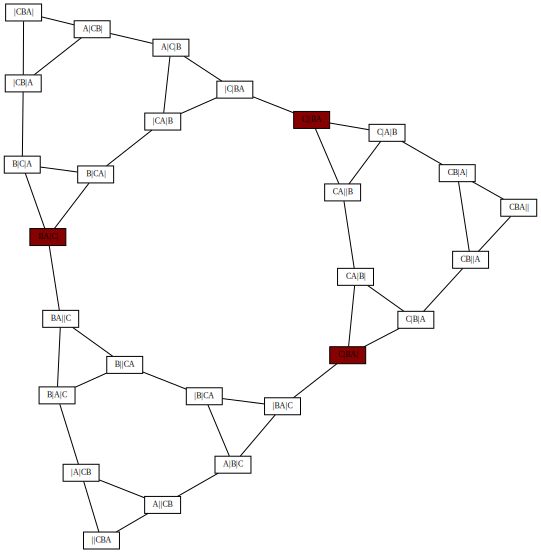

In [98]:
log_options(d[0])
diffplan.plot_graph(env, eta=d[0].softmax(1), labels=True)

- 2c, num_options=1
- 2c, num_options=2
- 2c, enumerate

In [26]:
# ????
# HACK need more options than goals! otherwise you burn your options trying to learn goals...
import copy
env = copy.copy(prior_envs.f2c)

D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)

env.goal_set = set(env.states_features)
env.start_states = env.states
#env.goal_set = {5, 6, 7, 8, 9}
#env.start_states = [0, 1, 2, 3, 4]
#env2goal.goal_set = {(5, 11), (5, 9), (1, 6), (3, 11)}
#env2goal.goal_set = {(5, 11), (5, 9)}
#c = torch.tensor(D + BFS).float()
c = (D + BFS).float()# * 1.5
# HACK will add_goal_options add literally them to every xx?
#terms = torch.zeros((2, len(env.states)))
#terms[0, 4] = 5.
#terms[1, 5] = 5.
d=diffplan.option_learner(env, reset=200, search_cost=c, progress=20, grad_steps=400, lr=0.05, num_options=1, goal_uniform_random=True, plot=False, add_goal_options=True, term_max=1.)


seed 643878500
19 6.638125419616699
39 6.596657752990723
59 6.535264015197754
79 6.51287841796875
99 6.4628143310546875
119 6.456088066101074
139 6.455104827880859
159 6.454736232757568
179 6.454517364501953
199 6.454363822937012
199 Reset optimizer state
219 6.453698635101318
239 6.453601837158203
259 6.453577995300293
279 6.4535675048828125
299 6.453561305999756
319 6.453558444976807
339 6.453554630279541
359 6.453553199768066
379 6.453551292419434
399 6.453549861907959
399 Reset optimizer state


In [27]:
eta = d[0].softmax(1)
for o in range(eta.shape[0]):
    print(o, sorted([(round(p.item(), 2), idx) for idx, p in enumerate(eta[o]) if p > 1e-2])[::-1])

0 [(1.0, 4)]


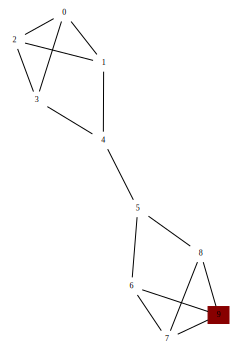

In [24]:
#diffplan.plot_graph(env, alphas=d[0][0].softmax(0),labels=[str(x) for x in env.states_features])
diffplan.plot_graph(env, eta=terms.softmax(1),labels=[str(x) for x in env.states_features])
#diffplan.plot_graph(env, eta=d[0].softmax(1),labels=[str(x) for x in env.states_features])
#diffplan.plot_graph(env, alphas=d[0][0].softmax(0))

# dists

In [608]:
env = f2f
D = diffplan.compute_distance_matrix(env)

BFS = diffplan.compute_bfs_matrix(env, D)

BFS_full = D + BFS

rw = diffplan.compute_random_walk_search_cost(env)

samples = 100

DFS_distance, DFS = diffplan.compute_dfs_matrix(env, samples=samples, tqdm=tqdm)
DFS_full = DFS_distance + DFS

heuristic_cost_estimate = np.zeros((len(env.states), len(env.states)))
a_star_distance, a_star_cost = astar.compute_astar_matrix(env, heuristic_cost_estimate, samples=samples, tqdm=tqdm)
a_star_total = a_star_distance + a_star_cost

 [████████████████████████████████████████████████████████████] 27/27 [00:33<00:01, 1.21s/it]

 [████████████████████████████████████████████████████████████] 27/27 [00:18<00:01, 0.68s/it]

In [543]:
for cost_name in ['D', 'DFS', 'DFS_full', 'a_star_distance', 'a_star_cost', 'a_star_total']:
    c = locals()[cost_name]
    costs = torch.zeros(len(env.states))
    for source, dests in [(0, torch.LongTensor([1, 4]))]:
        print(cost_name, c[source, dests])


D tensor([1., 2.])
DFS tensor([6.5200, 3.3100])
DFS_full tensor([7.5200, 5.3100])
a_star_distance tensor([1., 2.])
a_star_cost tensor([2.8500, 5.0000])
a_star_total tensor([3.8500, 7.0000])


In [545]:
lefts = torch.LongTensor([0, 1, 2, 3])
rights = torch.LongTensor([6, 7, 8, 9])

#c = BFS
#c = rw
#c = DFS
c = a_star_cost

#for cost_name in ['BFS', 'BFS_full', 'DFS', 'DFS_full', 'rw', 'a_star_cost', 'a_star_total']:
for cost_name in ['BFS', 'DFS', 'a_star_cost', 'rw', 'BFS_full', 'DFS_full', 'a_star_total']:
    c = locals()[cost_name]
    costs = torch.zeros(len(env.states))
    #for sources, dests in [(lefts, rights), (rights, lefts)]:
    d = 0
    for sources, dests in [(lefts, rights), (rights, lefts)]:
        for dest in dests:
            costs += c[sources].mean(0) + c[:, dest]
            d += 1
    print(cost_name, [round(x, 2) for x in (costs/d).numpy()])

BFS [11.0, 10.5, 11.0, 10.5, 10.75, 10.75, 10.5, 11.0, 10.5, 11.0]
DFS [12.1, 11.42, 12.14, 11.4, 10.08, 10.27, 11.48, 12.04, 11.28, 11.84]
a_star_cost [11.47, 11.19, 11.52, 11.19, 11.17, 11.11, 11.2, 11.44, 11.19, 11.54]
rw [48.13, 45.63, 48.13, 45.63, 38.13, 38.13, 45.63, 48.13, 45.63, 48.13]
BFS_full [16.25, 15.0, 16.25, 15.0, 14.75, 14.75, 15.0, 16.25, 15.0, 16.25]
DFS_full [17.36, 15.92, 17.38, 15.9, 14.08, 14.27, 15.98, 17.29, 15.78, 17.09]
a_star_total [16.72, 15.69, 16.77, 15.69, 15.17, 15.11, 15.7, 16.69, 15.69, 16.79]


In [789]:
env = f2f
D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
BFS_full = D + .5*BFS # was wondering if weight on BFS might change this...

In [81]:
h = envs.compute_blocks_distance_heuristic(env)
a_star_distance, a_star_cost = astar.compute_astar_matrix(env, h, samples=20, tqdm=tqdm)
a_star_total = a_star_distance + a_star_cost

 [████████████████████████████████████████████████████████████] 27/27 [00:16<00:01, 0.59s/it]

[((), ('C',), ('B', 'A'))]
tensor([19.9400, 18.9700, 15.8000, 15.6400, 15.6900, 15.6700, 18.6700, 19.7300,
        18.7400, 16.2800, 16.2800, 17.1200, 16.9600, 18.0800, 17.6100, 18.2700,
        17.8000, 18.1800, 15.6700, 15.8500, 16.9200, 16.9200, 20.8900, 16.4500,
        16.3300, 21.3900, 23.0400])
tensor([0.5811, 0.4500, 0.0216, 0.0000, 0.0068, 0.0041, 0.4095, 0.5527, 0.4189,
        0.0865, 0.0865, 0.2000, 0.1784, 0.3297, 0.2662, 0.3554, 0.2919, 0.3432,
        0.0041, 0.0284, 0.1730, 0.1730, 0.7095, 0.1095, 0.0932, 0.7770, 1.0000])


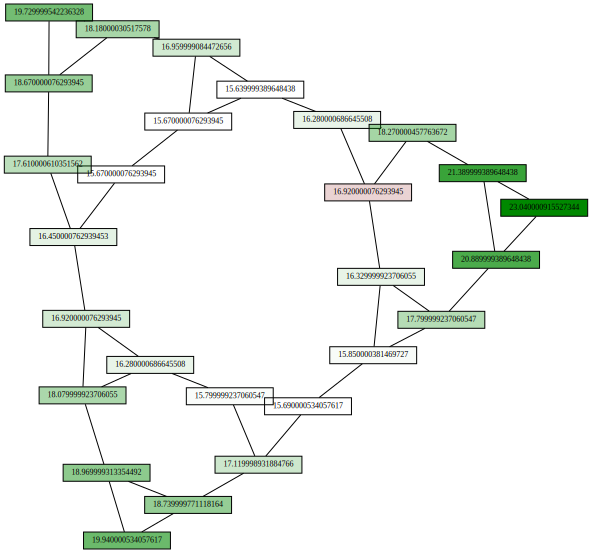

In [86]:
s = env.states_to_idx[(('B', 'A'),(),('C',))]
g = env.states_to_idx[(('C', 'A'),(),('B',))] # from the paper!
#g = env.states_to_idx[(('C', 'B'), ('A',), ())] # a potential study problem?

#s = env.states_to_idx[((), ('C', 'B'),('A',))]
#g = env.states_to_idx[(('C', 'B'),('A',), ())]

sc = a_star_distance + .2*a_star_cost + 4 # D + 3*BFS # was wondering if weight on BFS might change this...

c = sc[s, :] + sc[:, g]
print([env.states_features[i] for i in np.where(c==c.min())[0]])
print(c)
a = c - c.min()
a /= a.max()
print(a)
diffplan.plot_graph(
    env, alphas=a,
    labels=[str(x.item()) for x in c],
#    labels=True,
)